## Intermediate Data Science

#### University of Redlands - DATA 201
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data201.joannabieri.com](https://joannabieri.com/data201_intermediate.html)

In [1]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

# ML packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report

/opt/anaconda3/lib/python3.12/site-packages/kaleido/_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




---------------
## Linear and Logistic Regression - Day13 HW


Let's do an analysis of the Avocado Ripeness data from [https://www.kaggle.com/datasets/amldvvs/avocado-ripeness-classification-dataset](https://www.kaggle.com/datasets/amldvvs/avocado-ripeness-classification-dataset)

This is the same data from last class!

Explore some of the following research questions:

- Can you predict avocado firmness given one or more of the numerical features?
    - What model should you use here and why? (eg. Linear Regression vs Logistic Regression, Linear model vs. Nonlinear model)
    - Use appropriate numerical measures to talk about how good your model is (eg. for Linear Regression we would talk about MSE and $R^2$ but for Logistic Regression we might do a classification report)

- Can you predict whether or not an avocado is ripe based on one or more of the other features?
**NOTE - below I add a column for ripe 0/1** use this as your target.

     - What model should you use here and why? (eg. Linear Regression vs Logistic Regression, Linear model vs. Nonlinear model)
    - Use appropriate numerical measures to talk about how good your model is (eg. for Linear Regression we would talk about MSE and $R^2$ but for Logistic Regression we might do a classification report)


- In both cases play around with the models a little bit and see how you can get your best predictions!


NOTE - You should be able to look at the sns.pairplot() and say ahead of time which of the variables would be good for predicting either firmness or ripeness, just based on the shape of the graphs!


Please write up your conclusions.

**Your final notebooks should:**

- [ ] Be a completely new notebook with just the Day13 stuff in it NO YOU TRY: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] **Contain your "best models" for both questions ALONG WITH a discussion of what other things you tried and why these are your best results.**
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

In [3]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("amldvvs/avocado-ripeness-classification-dataset")

print("Path to dataset files:", path)

file = path + '/' + os.listdir(path)[0]
df = pd.read_csv(file)

Path to dataset files: /Users/jesusplascencia/.cache/kagglehub/datasets/amldvvs/avocado-ripeness-classification-dataset/versions/1


In [4]:
# Note this downloads three files. We will use the second one.
df['ripe'] = df['ripeness'].apply(lambda x: 1 if 'ripe' in x else 0) #Quick for loop 
df

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness,ripe
0,14.5,19,40,26,black,34,175,261,ripe,1
1,71.7,53,69,75,green,69,206,185,pre-conditioned,0
2,88.5,60,94,46,dark green,79,220,143,hard,0
3,93.8,105,87,41,dark green,75,299,140,hard,0
4,42.5,303,58,32,purple,63,200,227,breaking,0
...,...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,hard,0
246,21.6,17,36,19,black,47,182,240,firm-ripe,1
247,14.0,4,40,17,black,37,188,274,ripe,1
248,61.5,63,87,75,green,65,261,162,pre-conditioned,0


### 1] Explore the data, Ask how many Nan's, categories. 

I Explored This in my Day 12 Homework, I decided to not include the code in this Homework assignment. 

This dataset is licensed by Apache 2.0. We should expect it to never be updated upon its release and it is owned by Amal Dev. This Avocado dataset simulated labratory measurements of Hass avocados, their ripeness, firmness, hue, brightness, saturation, other variables. There are also 250 entries with 0 NaN values.

There are 9 unique columns with 250 observations. There appears to be two categorical values while the others are floats/integers. There also appears to be no NaN values and counts are consistent for each variable. When doing machine learning, Balance is of upmost importance. As I mentioned earlier, all variables have 250 observations, and it does not seem like data is leftward / rightward skewed.

When doing an outlier detection I noted visually that saturation is the relatively scattered. I used a outlier detection function and noted no outliers. When loooking at the hue "ripeness" I saw that firmness, sound, and weight, make sharp distinctions between the different levels of 'ripeness'. Variables such as brightness make seem have overlapping ripeness. When looking at the color_category, we get a similar story. Hue, firmness, sound, and size seem to be the best predictors for color birghtness. Overall, all the variables are relatively good predictors for ripeness, or color_category. I find it easier to classify ripeness because it is something easy to understand and explain. In other words, its more natural to predict ripeness based on other factors. Color, seems intuitive; however, I find color, brightness, hue, and saturation extremely similar.


### 2]What model to use? Then DO Test, Train, Split

To find out what model to use its best to visualize the data. I'll only consider doing a linear model or a logit, no KNN models. To get even more specific, we should use a linear model because we are attempting to print a value, not a category or a binary outcome which is where a logistic model is best. So for this homework we must use a linear model to predict firmness which is a float.

To check if my model used should be linear or non linear I'll visualze Y on X and see if the relationship is linear or nonlinear. What we found was that the data is linear. Saturation and firmness has a slight curve that may need to be specified for but other than that the relationship between my chosen x variables and y is linear 

#### As for model fit. Our goodness of fit or R^2 was 0.957 which means that our explanatory variables explained 95.7% of the variation in firmness. This is a great sign that hints towards a 

strong predictive model. Our Mean squared error was 28.922, and this measures how far our predictions are from actual values. This number may seem high, but in lectures it was mentioned that we can square the MSE to get rid of the ^2 in the formula. So this means that our predicted values are on average 5 units away from the true firmness which is not a large amount. These results serve to confirm that we have a good predictive model. 


In [9]:
df.dtypes

firmness          float64
hue                 int64
saturation          int64
brightness          int64
color_category     object
sound_db            int64
weight_g            int64
size_cm3            int64
ripeness           object
ripe                int64
dtype: object

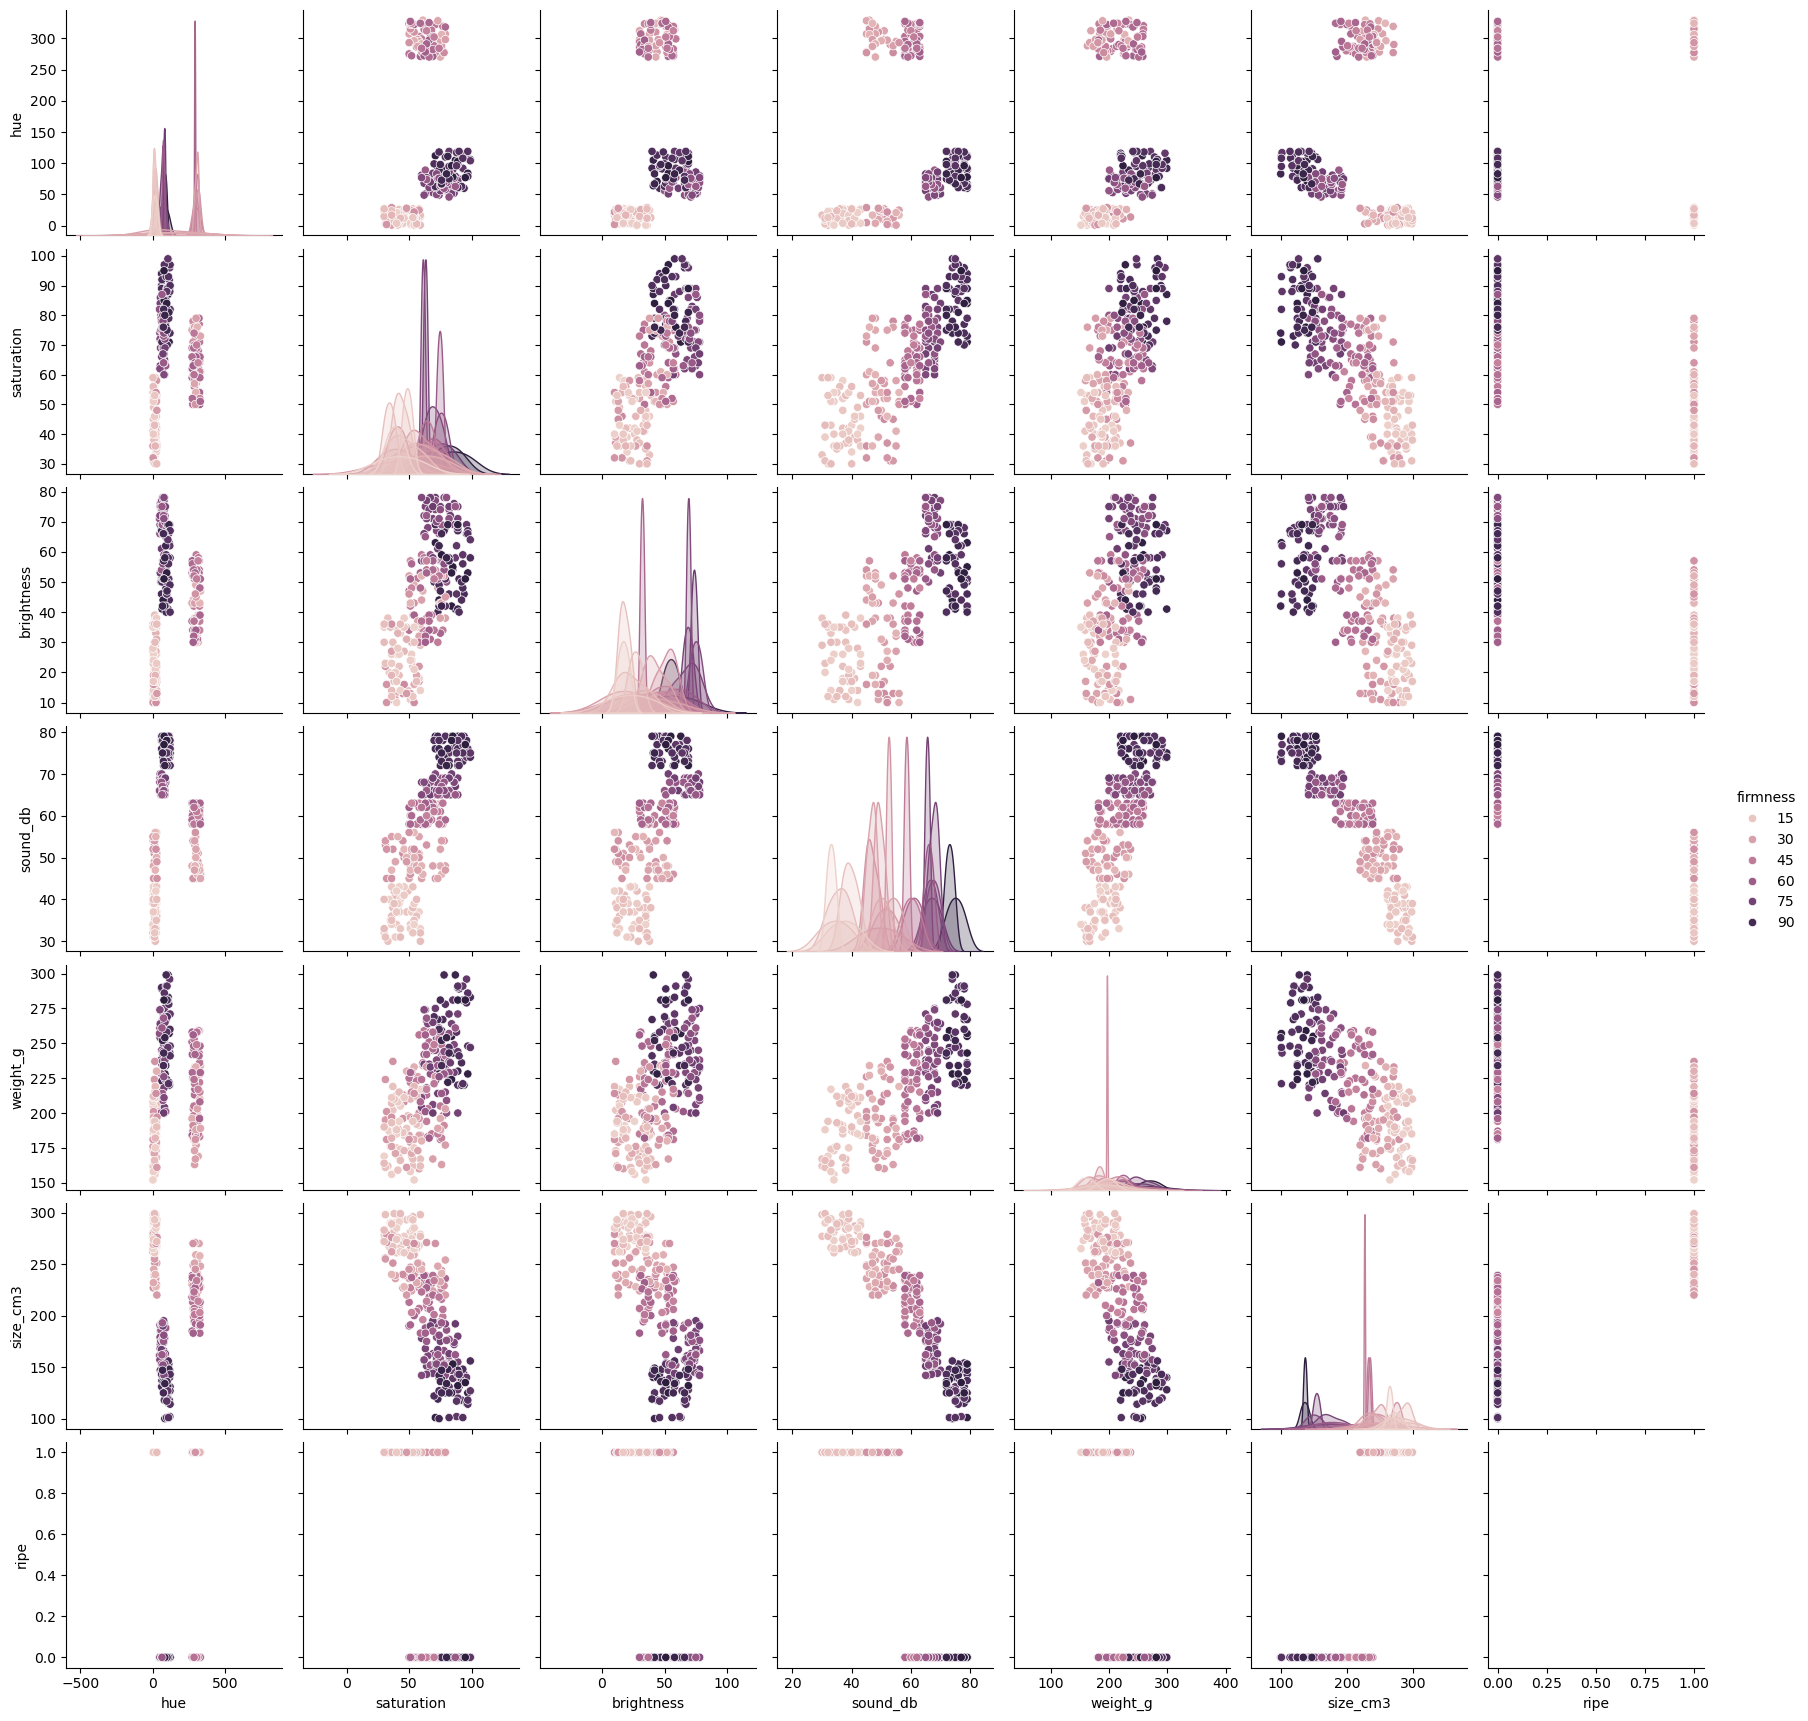

In [11]:
sns.pairplot(df, hue = 'firmness')

In [17]:
#Feature engineering
features = ['sound_db','weight_g', 'size_cm3','saturation'] # visually, sound, weight, size, and saturation seem to  distinguish between different levels of ripeness. 
target = ['firmness']

#using x predict y 
x1 = df[features]
y1 = df[target]

x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.2, random_state=42) #random state so our result are the same

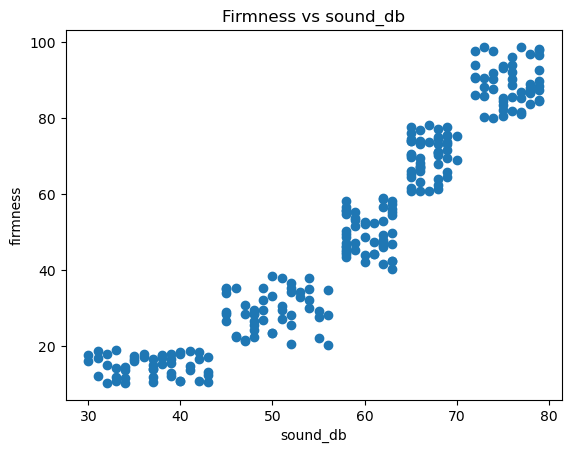

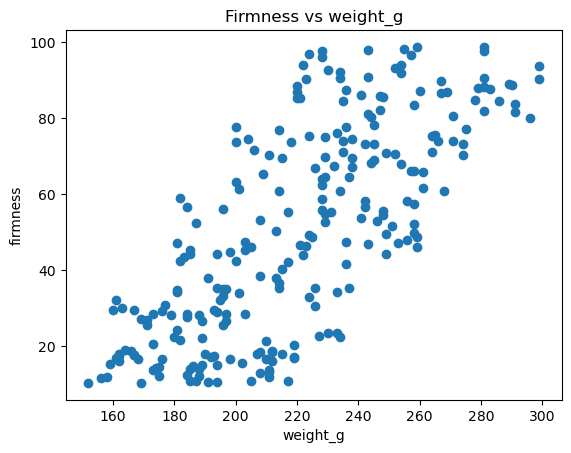

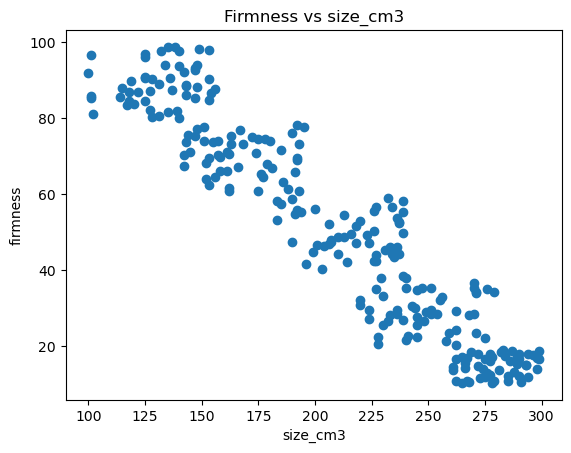

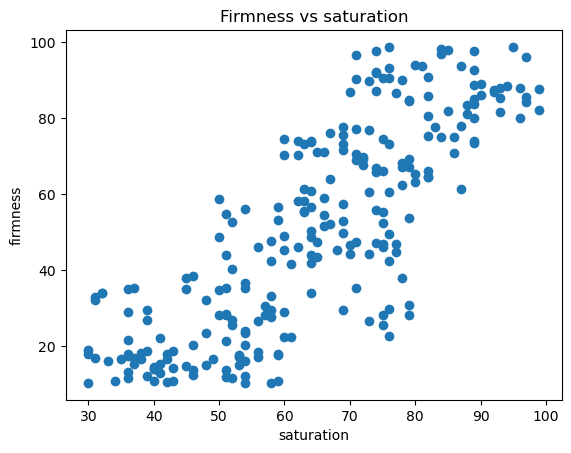

In [19]:
#linear or Non linear --> linear for the most part
for col in features: 
    plt.scatter(df[col], df['firmness'])
    plt.xlabel(col)
    plt.ylabel('firmness')
    plt.title(f'Firmness vs {col}')
    plt.show()
                



In [21]:
linreg = LinearRegression() #This is just a container telling python its ready to do a linear regression 
#next I want to fit the data

linreg.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
y_pred = linreg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE on test set: {mse:.3f}")
print(f"R² on test set: {r2:.3f}")

MSE on test set: 28.922
R² on test set: 0.957


### Further Specifying 

The one thing I would love to specify is the slight curve I observed for saturation vs firmness. I would like to add 2 degrees to account for this and make this linear. The problem with degree = 2 is that it takes all my features and squares them. I only want to square saturation not my other variables. As a result, we lose predictive power on our goodness of fit and have a low MSE (which is actually good). But overall, it seems like using degree = 2 is overfitting our model and it not helping.  

In [26]:
degree = 2

# Transform the x variables to be both x and x^2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred = linreg.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE on test set: {mse:.3f}")
print(f"R² on test set: {r2:.3f}")

MSE on test set: 26.715
R² on test set: 0.960


#### model specifying for only saturation which has the curve.

We have a slightly better model which is expected. When specifying for the slight curve observed in saturation vs firmness, our goodness of fit increased to 95.8% and our MSE decreased to 28.317. This also indicates that the relationship between saturation and firmness is not linear. Overall, afer squaring saturation we got a better model fit. 

In [31]:
df['saturation_sq'] = df['saturation']**2
#Feature engineering
features2 = ['sound_db','weight_g', 'size_cm3','saturation_sq'] # visually, sound, weight, size, and saturation seem to  distinguish between different levels of ripeness. 
target = ['firmness']

#using x predict y 
x2 = df[features2]
y1 = df[target]

x_train, x_test, y_train, y_test = train_test_split(x2,y1, test_size=0.2, random_state=42) #random state so our result are the same

In [33]:
linreg2 = LinearRegression() #This is just a container telling python its ready to do a linear regression 
#next I want to fit the data

linreg2.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
y_pred = linreg2.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE on test set: {mse:.3f}")
print(f"R² on test set: {r2:.3f}")

MSE on test set: 28.317
R² on test set: 0.958


### Predicting ripeness using logistic model.

We must use a logitstic model in this case because we are prediciting a binary outcome 1 or 0, aka true or false. The process is the exact same as the linear model except we use logisticregression().

#High precision rate means that you dont have any false positives or false neagtives, which means we have predicted ripeness perfectly. We have achieved an accuracy score of 1 which means we cannot do more with our model because it is very predictive of ripeness. In other words, give firmness and brightness, we will almost certaintly be able to predict an apples ripeness.

In [38]:
#Trying firness and brightness 

features = ['firmness','brightness'] # we think firmness and birghtness of the apple might predict if its ripe
target = ['ripe']

#using x predict y 
x = df[features]
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) #42 doesnt really matter

In [40]:
x_train

,firmness,brightness
132,75.6,58
225,53.3,48
238,90.5,66
119,53.7,53
136,20.3,10
...,...,...
106,98.8,59
14,28.3,52
92,69.4,68
179,49.8,54


In [42]:
logit_regression = LogisticRegression() #This is just a container telling python its ready to do a logistic regression 
#next I want to fit the data

#logit_regression.fit(x_train, y_train) #This has a problem with shape, python expects 1d 
logit_regression.fit(x_train, y_train.to_numpy().reshape(-1))

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [44]:
#How to fix column vector error .tonumpy sends our data to a one dimensional array and we can reshape it.
test = y_train.to_numpy().reshape(-1) #This is what we did so we inputted a 1d array which looks like (200,)
test.shape


(200,)

In [46]:
#Then do an accuracy test

y_true = y_test.to_numpy().reshape(-1)
y_pred = logit_regression.predict(x_test) 

accuracy_score(y_true, y_pred) 


1.0

In [48]:
#classification report 
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        22

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

